<a href="https://colab.research.google.com/github/DuypntTN/2FA-google-authenticator/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd

In [3]:
!ls

datasets  sample_data


In [5]:
# Load the CSV files into Pandas DataFrames
politifact_fake_df = pd.read_csv('./datasets/politifact_fake.csv')
politifact_real_df = pd.read_csv('./datasets/politifact_real.csv')
gossipcop_fake_df = pd.read_csv('./datasets/gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('./datasets/gossipcop_fake.csv')

In [ ]:
politifact_fake_df.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


## First we  have to analyse the dataset

In [6]:
# Basic dataset information
print("Number of rows in fake news dataset:", politifact_fake_df.shape[0])
print("Number of columns in fake news dataset:", politifact_fake_df.shape[1])
print("Data types in fake news dataset:")
print(politifact_fake_df.dtypes)


# Check for missing values
print("Missing values in fake news dataset:")
print(politifact_fake_df.isnull().sum())

print("Missing values in real news dataset:")
print(politifact_real_df.isnull().sum())


Number of rows in fake news dataset: 247
Number of columns in fake news dataset: 4
Data types in fake news dataset:
id           object
news_url     object
title        object
tweet_ids    object
dtype: object
Missing values in fake news dataset:
id            0
news_url      1
title         0
tweet_ids    22
dtype: int64
Missing values in real news dataset:
id            0
news_url     17
title         0
tweet_ids    66
dtype: int64


In [7]:
# Drop rows with null values from the fake news dataset
politifact_fake_df = politifact_fake_df.dropna()

# Verify that null values have been removed
print("Number of rows after dropping null values in fake news dataset:", politifact_fake_df.shape[0])

# Drop rows with null values from the real news dataset
politifact_fake_df = politifact_real_df.dropna()

# Verify that null values have been removed
print("Number of rows after dropping null values in fake news dataset:", politifact_real_df.shape[0])

Number of rows after dropping null values in fake news dataset: 224
Number of rows after dropping null values in fake news dataset: 189


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))
politifact_fake_df.loc[:, 'title'] = politifact_fake_df['title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word not in stop_words])

# Lowercase and tokenize the title column for real news (assuming it's already tokenized)
# Remove stopwords and punctuation for real news
politifact_real_df.loc[:, 'title'] = politifact_real_df['title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word not in stop_words])

<ipython-input-9-4d6edc5b314b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politifact_fake_df.loc[:, 'title'] = politifact_fake_df['title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word not in stop_words])


In [10]:
politifact_fake_df.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,"[n, n, l, f, e, e, r, n, f, i, n, e, p, e, n, ...",967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,"[c, e, n, n, f, e, e, v, l, l, e, n, c]",942953459\t8980098198\t16253717352\t1668513250...
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"[b, u, g, e, f, h, e, u, n, e, s, e, g, v, e, ...",89804710374154240\t91270460595109888\t96039619...
5,politifact14064,http://www.politifact.com/truth-o-meter/statem...,"[d, n, l, t, r, u, p, e, x, g, g, e, r, e, w, ...",690248006399049728\t690254026663821312\t690276...
6,politifact14474,https://www.law.cornell.edu/constitution/amend...,"[2, 5, h, a, e, n, e, n]",1262604762\t10969740933\t11182364398\t17507543...


In [11]:
politifact_real_df.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,"[n, n, l, f, e, e, r, n, f, i, n, e, p, e, n, ...",967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,"[c, e, n, n, f, e, e, v, l, l, e, n, c]",942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"[r, n, e, k, e, p, c, h, h, p, n, g, c, l, e, ...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,"[d, e, c, r, c, l, e, e, r, s, h, u, e, d, e, ...",NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"[b, u, g, e, f, h, e, u, n, e, s, e, g, v, e, ...",89804710374154240\t91270460595109888\t96039619...


In [13]:
import pandas as pd
import networkx as nx

## Create a graph for the fake dataset

In [14]:
# Create an empty directed graph for fake news
G_fake = nx.DiGraph()

In [15]:
# Iterate through the fake news dataset and add nodes (tweets) to the graph
for index, row in politifact_fake_df.iterrows():
    tweet_ids = row['tweet_ids'].split('\t')

    for tweet_id in tweet_ids:
        G_fake.add_node(tweet_id)

# Define and add edges to the fake news graph based on the 'id' column as the original tweet ID
for index, row in politifact_fake_df.iterrows():
    tweet_ids = row['tweet_ids'].split('\t')
    original_tweet_id = row['id']

    for tweet_id in tweet_ids:
        if original_tweet_id:
            G_fake.add_edge(tweet_id, original_tweet_id)

In [16]:
print("Number of nodes:", G_fake.number_of_nodes())
print("Number of edges:", G_fake.number_of_edges())
print("Is directed graph:", nx.is_directed(G_fake))

Number of nodes: 104818
Number of edges: 104849
Is directed graph: True


In [17]:
# Calculate the degrees of all nodes in the graph
degrees = dict(G_fake.degree())

# Find the node with the highest degree
node_with_highest_degree = max(degrees, key=degrees.get)

# Get the degree value of the node with the highest degree
highest_degree = degrees[node_with_highest_degree]

print("Node with the highest degree:", node_with_highest_degree)
print("Highest degree:", highest_degree)

Node with the highest degree: politifact954
Highest degree: 12741


In [18]:
# Assuming you have a NetworkX graph named G_fake
degrees = [degree for node, degree in G_fake.degree()]

# Calculate the total number of degrees
total_degrees = sum(degrees)

# Print the total number of degrees
print("Total number of degrees in the graph:", total_degrees)

Total number of degrees in the graph: 209698


## Create a graph for the real dataset

In [19]:
# Create an empty directed graph for fake news
G_real = nx.DiGraph()

In [20]:
# Iterate through the real news dataset and add nodes (tweets) to the graph
for index, row in politifact_real_df.iterrows():
    tweet_ids = str(row['tweet_ids']).split('\t')

    for tweet_id in tweet_ids:
        G_real.add_node(tweet_id)

# Define and add edges to the real news graph based on the 'id' column as the original tweet ID
for index, row in politifact_real_df.iterrows():
    tweet_ids = str(row['tweet_ids']).split('\t')
    original_tweet_id = str(row['id'])

    for tweet_id in tweet_ids:
        if original_tweet_id:
            G_real.add_edge(tweet_id, original_tweet_id)

In [21]:
print("Number of nodes:", G_real.number_of_nodes())
print("Number of edges:", G_real.number_of_edges())
print("Is directed graph:", nx.is_directed(G_real))

Number of nodes: 107209
Number of edges: 107230
Is directed graph: True


In [22]:
# Calculate the degrees of all nodes in the graph
degrees = dict(G_real.degree())

# Find the node with the highest degree
node_with_highest_degree = max(degrees, key=degrees.get)

# Get the degree value of the node with the highest degree
highest_degree = degrees[node_with_highest_degree]

print("Node with the highest degree:", node_with_highest_degree)
print("Highest degree:", highest_degree)

Node with the highest degree: politifact954
Highest degree: 12741


In [23]:

# Assuming you have a NetworkX graph named G_fake
degrees = [degree for node, degree in G_real.degree()]

# Calculate the total number of degrees
total_degrees = sum(degrees)

# Print the total number of degrees
print("Total number of degrees in the graph:", total_degrees)

Total number of degrees in the graph: 214460


In [24]:
import networkx as nx

# Assuming G_fake is your NetworkX graph

# Specify the path where you want to save the GEXF file
output_path = "fake_news_graph.gexf"

# Export the graph to GEXF format
nx.write_gexf(G_fake, output_path)

print(f"Graph has been exported to {output_path}")

Graph has been exported to fake_news_graph.gexf


In [25]:
# Specify the path where you want to save the GEXF file
output_path = "real_news_graph.gexf"

# Export the graph to GEXF format
nx.write_gexf(G_fake, output_path)

print(f"Graph has been exported to {output_path}")

Graph has been exported to real_news_graph.gexf


In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import random

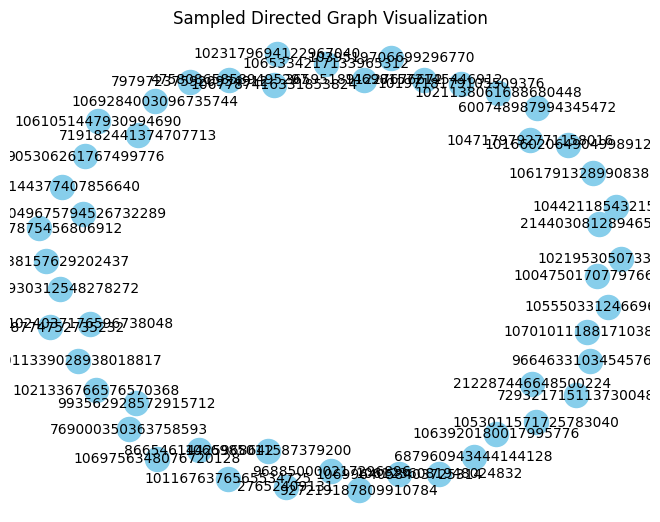

In [27]:
# Set a seed for reproducibility
random.seed(42)

# Define the number of nodes to sample (50 in this case)
num_nodes_to_sample = 50

# Convert the graph view into a list of nodes and then sample from it
node_list = list(G_fake.nodes())
sampled_nodes = random.sample(node_list, num_nodes_to_sample)

# Create a subgraph containing only the sampled nodes and their edges
subgraph = G_fake.subgraph(sampled_nodes)

# Define a layout for the nodes
pos = nx.spring_layout(subgraph)

# Draw the subgraph using Matplotlib
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black",
        width=1.5,  # Increase the width of edges
        arrows=True)

plt.title("Sampled Directed Graph Visualization")
plt.show()

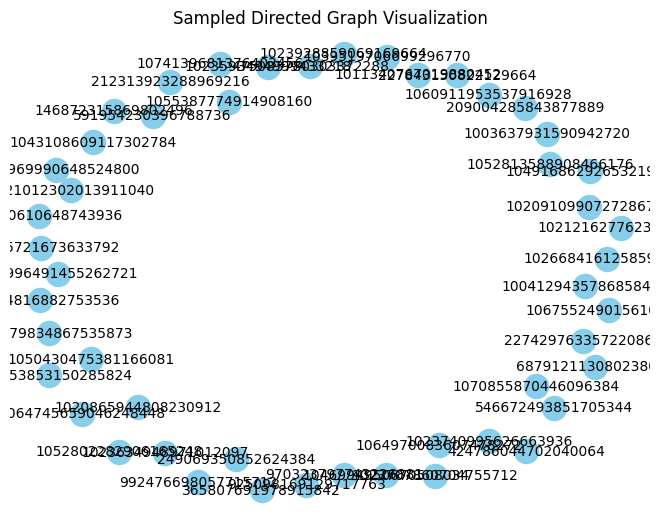

In [28]:
# Set a seed for reproducibility
random.seed(42)

# Define the number of nodes to sample (50 in this case)
num_nodes_to_sample = 50

# Convert the graph view into a list of nodes and then sample from it
node_list = list(G_real.nodes())
sampled_nodes = random.sample(node_list, num_nodes_to_sample)

# Create a subgraph containing only the sampled nodes and their edges
subgraph = G_fake.subgraph(sampled_nodes)

# Define a layout for the nodes
pos = nx.spring_layout(subgraph)

# Draw the subgraph using Matplotlib
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black",
        width=1.5,  # Increase the width of edges
        arrows=True)

plt.title("Sampled Directed Graph Visualization")
plt.show()


## Building a GCN for the datasets

In [29]:
# Install torch geometric
import os
if 'IS_GRADESCOPE_ENV' not in os.environ:
  %pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
  %pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
  %pip install torch-geometric
  %pip install -q git+https://github.com/snap-stanford/deepsnap.git

import torch_geometric
torch_geometric.__version__

Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 39.8 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=b016c982887298a25e05e5a4ff0feed4f4287126a64de05047510146a2f777e4
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_scatter_cuda.so: undefined symbol: _ZN2at4_ops6narrow4callERKNS_6TensorElll
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_diag_cuda.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


'2.3.1'

In [30]:
import argparse
import os.path as osp
import numpy as np
from math import ceil
import pandas as pd
import copy
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.nn import Linear

from torch_geometric.datasets import UPFD
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, GCNConv, SAGEConv, global_max_pool, DenseSAGEConv
from torch_geometric.transforms import ToUndirected
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from torch_geometric.nn import global_mean_pool as gmp

import torch.nn.functional as F
from torch_geometric.data import DenseDataLoader
import torch_geometric.transforms as T
from torch_geometric.nn import DenseSAGEConv, dense_diff_pool
from torch.utils.data import random_split

In [31]:
def load_data(split):
  """
  Load train, validation, and test data from the UPFD dataset in PyG. Concact node
  features *profile* and *bert*, which are Twitter user's profile attributes and
  historical tweets encoded through BERT respectively.

  -------------------------------------
  split: 'train', 'val', or 'test' for retrieving the respective portion of UPFD.

  -------------------------------------
  Return: PyG dataset object.
  """

  data_profile =  UPFD('/tmp/test', "politifact", "profile", split, ToUndirected())
  data_bert =  UPFD('/tmp/test', "politifact", "bert", split, ToUndirected())
  data_profile.data.x = torch.cat((data_profile.data.x, data_bert.data.x),dim =1)

  return data_profile

In [32]:
# Retrieve data
train_data = load_data('train')
test_data = load_data('test')
val_data = load_data('val')

# Prepare data loader for GNN
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Extracting /tmp/test/politifact/raw/uc
Processing...
Done!
Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [33]:
print(train_loader.dataset)

UPFD(62, name=politifact, feature=profile)


In [34]:
# Visualize a sample of the data
train_data[0]
# Values of the node features
print(f"Values of the node features",train_data[0].x)
# Values of the node
print(f"Values of the node labels",train_data[0].y)

Values of the node features tensor([[ 0.0000e+00,  0.0000e+00,  2.9157e-03,  ..., -4.1986e-01,
          2.4461e-01,  1.0323e+00],
        [ 1.0000e+00,  1.0000e+00,  9.4289e-02,  ...,  4.2206e-01,
         -1.9412e-01,  2.6846e-01],
        [ 0.0000e+00,  0.0000e+00,  1.0817e-05,  ...,  3.7303e-01,
         -2.4978e-03,  5.8866e-01],
        ...,
        [ 0.0000e+00,  1.0000e+00,  3.0198e-05,  ...,  3.6435e-01,
         -3.7590e-02,  5.0081e-01],
        [ 0.0000e+00,  0.0000e+00,  2.9157e-03,  ...,  4.0440e-01,
         -6.1563e-02,  4.9723e-01],
        [ 0.0000e+00,  0.0000e+00,  2.9157e-03,  ...,  4.0440e-01,
         -6.1563e-02,  4.9723e-01]])
Values of the node labels tensor([0])


In [35]:
# Use pandas to visualize the data
pd.DataFrame(train_data[0]).head()

,0,1
0,x,"[[tensor(0.), tensor(0.), tensor(0.0029), tens..."
1,edge_index,"[[tensor(0), tensor(0), tensor(0), tensor(0), ..."
2,y,[tensor(0)]


In [36]:
class GCN(torch.nn.Module):
  def __init__(self, args):
    """
    Initialize a simple GCN with specific parameters.

    By default, this GCN has 2 convolutional layers and 1 linear layer.
    It also has 1 layer of batch normalization between the two conv-layers.

    If num_layers is provided by user, then this function initializes
    corresponding number of convolutional layers, with batch normalization
    in between. Num_layers must be >= 2.

    -------------------------------------
    self: GCN object
    args["num_features"]: dimension of the input
    args["hidden_dim"]: dimension of the hidden layer(s)
    args["num_classes"]: dimension of the output (i.e. number of classes)
    args["dropout"]: percentage of neurons being zeroed, can be None
    args["num_layers"]: number of convolutional layers, must be >= 2

    """

    assert args.num_layers >= 2, "num_layers must be >= 2."

    super(GCN, self).__init__()

    # Initialize parameters
    self.num_layers = args.num_layers
    self.dropout = args.dropout

    # Initialize the first convolutional layer
    self.convs = torch.nn.ModuleList([GCNConv(args.num_features, args.hidden_dim)])

    # Initialize batch normalization layer
    self.bns = torch.nn.ModuleList()

    # Initialize batch normalization layer(s) and the rest of the convolutional layer(s)
    for _ in range(self.num_layers - 1):

      # Initialize the batch normalization layer
      self.bns.extend([torch.nn.BatchNorm1d(args.hidden_dim)])

      # Initialize the second convolutional layer
      self.convs.extend([GCNConv(args.hidden_dim, args.hidden_dim)])

    # Initialize the final linear layer
    self.lin0 = Linear(args.hidden_dim, args.num_classes)



  def reset_parameters(self):
    """
    Reset training parameters for gradient descent.
    """
    for conv in self.convs:
        conv.reset_parameters()
    for bn in self.bns:
        bn.reset_parameters()

  def forward(self, data):
    """
    One forward pass with GCN.

    -------------------------------------
    data: PyG Dataset data object, with properties like x, edge_index, batch, etc.

    -------------------------------------
    Return: prediction at the end of one epoch.
    """

    # get features and adjacency matrix
    # -- the batch propery associate nodes within one graph together, it takes
    #    the form of [1,...,1,2,...2,...,n,...,n] with n being the number of
    #    independent graphs in the entire dataset
    out, edge_index, batch = data.x, data.edge_index, data.batch

    # apply one layer of GNN at a time
    for i in range(self.num_layers - 1):

      # convolutional layer
      out = self.convs[i](out, edge_index)

      # batch normalization
      out = self.bns[i](out)

      # non-linear activation with Re-Lu
      out = F.relu(out)

      # drop out if requested
      if self.dropout > 0:
        out = F.dropout(out, training=self.training)

    # the last convolutional layer
    out = self.convs[i+1](out, edge_index)

    # apply graph level pooling per batch (each bath is one indenpendent graph)
    # -- embeddings of each batch/graph with k nodes (1 news node, k-1 user nodes)
    #    are pooled with the mean method to generate a batch/graph level embedding
    #    for lebel prediction
    out = gmp(out, batch)

    df = pd.DataFrame(data=out.detach().numpy())
    df.to_csv('embed.csv', sep=' ', header=False, index=False)

    # the final linear layer
    out = self.lin0(out)

    # soft max for final prediction
    out = F.log_softmax(out, dim=-1)

    return out


In [37]:
def forward_for_viz(data):
  """
  Function to output the visualization in Medium post
  """

  out, edge_index, batch = data.x, data.edge_index, data.batch

  out = gmp(out, batch)

  return out

In [38]:
"""
parser add argument (optimizer, loss_fn, eval_metrics defualt accuracy)
"""

def train(model, data, optimizer, loss_fn):
  """
  Train the model using given data, optimizer, and loss_fn
  --------------------------------------
  model: the model we specified
  data: train data multiple batches of graphs, therefore needs to loop through each batch of graph
        and add loss of each graph results.
  """
  out_loss = 0.0
  for i, data in enumerate(data):

    optimizer.zero_grad()
    data = data.to(args.device)
    out = model(data)
    y = data.y
    loss = loss_fn(out,y)

    loss.backward()
    optimizer.step()

    out_loss += loss.item()

  return out_loss

In [39]:
@torch.no_grad()
def evaluate(model, loader, eval_metric = 'all'):
  """
  Evaluate performance of the a GCN model based on the eval_metric.
  """

  # Put model in evaluation mode
  model.eval()

  pred = []
  label = []

  for data in loader:
    pred_y = model(data).argmax(dim=-1, keepdim=True).tolist()
    pred.extend(pred_y)
    label.extend(data.y)

  acc = accuracy_score(label, pred)
  f1 = f1_score(label, pred)
  auc = roc_auc_score(label, pred)

  return acc, f1, auc

In [40]:
parser = argparse.ArgumentParser()

parser.add_argument('--seed', type=int, default=777, help='random seed')
parser.add_argument('--device', type=str, default='cpu', help='specify cuda devices')

# hyper-parameters
parser.add_argument('--dataset', type=str, default='gossipcop', help='[politifact, gossipcop]')
parser.add_argument('--batch_size', type=int, default=128, help='batch size')
parser.add_argument('--lr', type=float, default=0.01, help='learning rate')
parser.add_argument('--weight_decay', type=float, default=0.01, help='weight decay')
parser.add_argument('--hidden_dim', type=int, default=128, help='hidden size')
parser.add_argument('--dropout', type=float, default=0.0, help='dropout ratio')
parser.add_argument('--epochs', type=int, default=100, help='maximum number of epochs')
parser.add_argument('--concat', type=bool, default=True, help='whether concat news embedding and graph embedding')
parser.add_argument('--multi_gpu', type=bool, default=False, help='multi-gpu mode')
parser.add_argument('--feature', type=str, default='bert', help='feature type, [profile, spacy, bert, content]')
parser.add_argument('--model', type=str, default='gcn', help='model type, [gcn, gat, sage]')
parser.add_argument('--eval', type = str, default = 'accuracy', help = 'evaluation type')
parser.add_argument('--num_layers', type=str, default = 2, help = 'num of GNN layers')

args, _ = parser.parse_known_args()
torch.manual_seed(args.seed)
if torch.cuda.is_available():
	torch.cuda.manual_seed(args.seed)

args.num_classes = train_data.num_classes
args.num_features = train_data.num_features

model = GCN(args)
model = model.to(args.device)

In [41]:
#if __name__ == '__main__':
model.reset_parameters()

best_model = None
best_val_value = 0

evaluator = args.eval

optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay = args.weight_decay)
loss_fn = F.nll_loss

model.train()
for epoch in tqdm(range(1, args.epochs)):
  loss = train(model, train_loader, optimizer, loss_fn)
  train_eval = evaluate(model, train_loader)
  val_eval = evaluate(model, val_loader)
  if val_eval[0] > best_val_value:
    best_val_value = val_eval[0]
    best_model = copy.deepcopy(model)
  print(f'loss_train:{loss:.4f}, train_{evaluator}:{train_eval[0]:.4f}, val_{evaluator}:{val_eval[0]:.4f} ')
acc, f1, auc = evaluate(best_model, test_loader)
print(f'Test results: acc {acc:.4f}, f1 score: {f1:.4f}, auc: {auc:.4f}' )

  1%|          | 1/99 [00:00<00:44,  2.18it/s]

loss_train:0.7377, train_accuracy:0.5806, val_accuracy:0.4194 


  2%|▏         | 2/99 [00:00<00:35,  2.73it/s]

loss_train:2.7296, train_accuracy:0.7419, val_accuracy:0.8065 


  3%|▎         | 3/99 [00:01<00:32,  2.98it/s]

loss_train:0.6723, train_accuracy:0.4194, val_accuracy:0.5806 


  4%|▍         | 4/99 [00:01<00:30,  3.16it/s]

loss_train:0.7577, train_accuracy:0.5806, val_accuracy:0.4194 


  5%|▌         | 5/99 [00:01<00:29,  3.22it/s]

loss_train:0.6781, train_accuracy:0.5806, val_accuracy:0.4194 


  6%|▌         | 6/99 [00:01<00:28,  3.25it/s]

loss_train:0.7401, train_accuracy:0.5806, val_accuracy:0.4194 


  7%|▋         | 7/99 [00:02<00:27,  3.31it/s]

loss_train:0.6846, train_accuracy:0.5806, val_accuracy:0.4194 


  8%|▊         | 8/99 [00:02<00:27,  3.32it/s]

loss_train:0.6814, train_accuracy:0.5161, val_accuracy:0.6452 


  9%|▉         | 9/99 [00:02<00:27,  3.28it/s]

loss_train:0.6902, train_accuracy:0.5806, val_accuracy:0.4194 


 10%|█         | 10/99 [00:03<00:26,  3.32it/s]

loss_train:0.6781, train_accuracy:0.5806, val_accuracy:0.4194 


 11%|█         | 11/99 [00:03<00:29,  3.03it/s]

loss_train:0.6713, train_accuracy:0.5806, val_accuracy:0.4194 


 12%|█▏        | 12/99 [00:04<00:34,  2.52it/s]

loss_train:0.6752, train_accuracy:0.5806, val_accuracy:0.4194 


 13%|█▎        | 13/99 [00:04<00:44,  1.95it/s]

loss_train:0.6661, train_accuracy:0.5806, val_accuracy:0.4194 


 14%|█▍        | 14/99 [00:05<00:58,  1.45it/s]

loss_train:0.6651, train_accuracy:0.5806, val_accuracy:0.4194 


 15%|█▌        | 15/99 [00:07<01:09,  1.21it/s]

loss_train:0.6630, train_accuracy:0.5806, val_accuracy:0.4194 


 16%|█▌        | 16/99 [00:08<01:13,  1.13it/s]

loss_train:0.6562, train_accuracy:0.5806, val_accuracy:0.4194 


 17%|█▋        | 17/99 [00:08<01:06,  1.23it/s]

loss_train:0.6516, train_accuracy:0.5806, val_accuracy:0.4194 


 18%|█▊        | 18/99 [00:09<01:01,  1.33it/s]

loss_train:0.6456, train_accuracy:0.5806, val_accuracy:0.4194 


 19%|█▉        | 19/99 [00:09<00:55,  1.45it/s]

loss_train:0.6361, train_accuracy:0.5968, val_accuracy:0.4516 


 20%|██        | 20/99 [00:10<00:50,  1.57it/s]

loss_train:0.6291, train_accuracy:0.5806, val_accuracy:0.4194 


 21%|██        | 21/99 [00:11<00:47,  1.63it/s]

loss_train:0.6156, train_accuracy:0.5806, val_accuracy:0.4194 


 22%|██▏       | 22/99 [00:11<00:45,  1.71it/s]

loss_train:0.6043, train_accuracy:0.7903, val_accuracy:0.6452 


 23%|██▎       | 23/99 [00:12<00:42,  1.80it/s]

loss_train:0.5865, train_accuracy:0.8548, val_accuracy:0.8065 


 24%|██▍       | 24/99 [00:12<00:42,  1.77it/s]

loss_train:0.5721, train_accuracy:0.5806, val_accuracy:0.4194 


 25%|██▌       | 25/99 [00:13<00:42,  1.75it/s]

loss_train:0.5638, train_accuracy:0.7258, val_accuracy:0.7742 


 26%|██▋       | 26/99 [00:13<00:44,  1.65it/s]

loss_train:0.5609, train_accuracy:0.7903, val_accuracy:0.5806 


 27%|██▋       | 27/99 [00:14<00:41,  1.75it/s]

loss_train:0.5171, train_accuracy:0.8710, val_accuracy:0.7097 


 28%|██▊       | 28/99 [00:15<00:42,  1.67it/s]

loss_train:0.4879, train_accuracy:0.7581, val_accuracy:0.8065 


 29%|██▉       | 29/99 [00:15<00:39,  1.76it/s]

loss_train:0.5004, train_accuracy:0.6290, val_accuracy:0.4516 


 30%|███       | 30/99 [00:16<00:38,  1.80it/s]

loss_train:0.5272, train_accuracy:0.8065, val_accuracy:0.7742 


 31%|███▏      | 31/99 [00:16<00:38,  1.76it/s]

loss_train:0.4443, train_accuracy:0.8226, val_accuracy:0.7742 


 32%|███▏      | 32/99 [00:17<00:41,  1.60it/s]

loss_train:0.4201, train_accuracy:0.6774, val_accuracy:0.4516 


 33%|███▎      | 33/99 [00:17<00:39,  1.66it/s]

loss_train:0.4825, train_accuracy:0.8226, val_accuracy:0.7742 


 34%|███▍      | 34/99 [00:18<00:42,  1.51it/s]

loss_train:0.4255, train_accuracy:0.8548, val_accuracy:0.8065 


 35%|███▌      | 35/99 [00:20<00:57,  1.11it/s]

loss_train:0.3620, train_accuracy:0.7903, val_accuracy:0.4839 


 36%|███▋      | 36/99 [00:21<01:05,  1.05s/it]

loss_train:0.4297, train_accuracy:0.8548, val_accuracy:0.7742 


 37%|███▋      | 37/99 [00:22<01:04,  1.04s/it]

loss_train:0.3736, train_accuracy:0.8710, val_accuracy:0.8065 


 38%|███▊      | 38/99 [00:23<00:57,  1.06it/s]

loss_train:0.3221, train_accuracy:0.8226, val_accuracy:0.6452 


 39%|███▉      | 39/99 [00:23<00:49,  1.21it/s]

loss_train:0.3813, train_accuracy:0.8548, val_accuracy:0.7742 


 40%|████      | 40/99 [00:24<00:46,  1.27it/s]

loss_train:0.3318, train_accuracy:0.9032, val_accuracy:0.8065 


 41%|████▏     | 41/99 [00:25<00:40,  1.42it/s]

loss_train:0.2812, train_accuracy:0.8548, val_accuracy:0.6774 


 42%|████▏     | 42/99 [00:25<00:42,  1.33it/s]

loss_train:0.3298, train_accuracy:0.8548, val_accuracy:0.8065 


 43%|████▎     | 43/99 [00:27<01:02,  1.12s/it]

loss_train:0.3197, train_accuracy:0.9516, val_accuracy:0.8065 


 44%|████▍     | 44/99 [00:28<00:54,  1.00it/s]

loss_train:0.2533, train_accuracy:0.9032, val_accuracy:0.8065 


 45%|████▌     | 45/99 [00:29<00:56,  1.04s/it]

loss_train:0.2539, train_accuracy:0.8710, val_accuracy:0.8065 


 46%|████▋     | 46/99 [00:30<00:48,  1.08it/s]

loss_train:0.2972, train_accuracy:0.8871, val_accuracy:0.6774 


 47%|████▋     | 47/99 [00:31<00:47,  1.09it/s]

loss_train:0.2917, train_accuracy:0.8871, val_accuracy:0.8065 


 48%|████▊     | 48/99 [00:32<00:43,  1.18it/s]

loss_train:0.2235, train_accuracy:0.9194, val_accuracy:0.8065 


 49%|████▉     | 49/99 [00:32<00:37,  1.34it/s]

loss_train:0.2099, train_accuracy:0.9032, val_accuracy:0.6774 


 51%|█████     | 50/99 [00:33<00:35,  1.40it/s]

loss_train:0.2536, train_accuracy:0.8710, val_accuracy:0.8065 


 52%|█████▏    | 51/99 [00:33<00:32,  1.46it/s]

loss_train:0.2698, train_accuracy:0.9032, val_accuracy:0.7097 


 53%|█████▎    | 52/99 [00:34<00:33,  1.42it/s]

loss_train:0.2326, train_accuracy:0.9677, val_accuracy:0.8387 


 54%|█████▎    | 53/99 [00:35<00:34,  1.32it/s]

loss_train:0.1780, train_accuracy:0.9194, val_accuracy:0.8387 


 55%|█████▍    | 54/99 [00:35<00:31,  1.44it/s]

loss_train:0.1859, train_accuracy:0.9032, val_accuracy:0.6774 


 56%|█████▌    | 55/99 [00:36<00:27,  1.59it/s]

loss_train:0.2302, train_accuracy:0.8871, val_accuracy:0.8065 


 57%|█████▋    | 56/99 [00:36<00:24,  1.73it/s]

loss_train:0.2359, train_accuracy:0.9032, val_accuracy:0.7419 


 58%|█████▊    | 57/99 [00:37<00:22,  1.89it/s]

loss_train:0.1969, train_accuracy:0.9839, val_accuracy:0.8387 


 59%|█████▊    | 58/99 [00:37<00:19,  2.15it/s]

loss_train:0.1513, train_accuracy:0.9516, val_accuracy:0.8710 


 60%|█████▉    | 59/99 [00:37<00:16,  2.39it/s]

loss_train:0.1604, train_accuracy:0.9032, val_accuracy:0.7097 


 61%|██████    | 60/99 [00:38<00:14,  2.60it/s]

loss_train:0.1988, train_accuracy:0.9032, val_accuracy:0.8387 


 62%|██████▏   | 61/99 [00:38<00:13,  2.77it/s]

loss_train:0.2063, train_accuracy:0.9032, val_accuracy:0.7419 


 63%|██████▎   | 62/99 [00:38<00:12,  2.94it/s]

loss_train:0.1783, train_accuracy:0.9839, val_accuracy:0.8387 


 64%|██████▎   | 63/99 [00:39<00:11,  3.05it/s]

loss_train:0.1357, train_accuracy:0.9839, val_accuracy:0.8387 


 65%|██████▍   | 64/99 [00:39<00:11,  3.09it/s]

loss_train:0.1342, train_accuracy:0.9355, val_accuracy:0.7419 


 66%|██████▌   | 65/99 [00:39<00:10,  3.18it/s]

loss_train:0.1636, train_accuracy:0.9194, val_accuracy:0.8387 


 67%|██████▋   | 66/99 [00:40<00:10,  3.22it/s]

loss_train:0.1782, train_accuracy:0.9194, val_accuracy:0.7419 


 68%|██████▊   | 67/99 [00:40<00:09,  3.28it/s]

loss_train:0.1688, train_accuracy:0.9516, val_accuracy:0.8710 


 69%|██████▊   | 68/99 [00:40<00:09,  3.25it/s]

loss_train:0.1327, train_accuracy:0.9839, val_accuracy:0.8710 


 70%|██████▉   | 69/99 [00:41<00:09,  3.18it/s]

loss_train:0.1143, train_accuracy:0.9839, val_accuracy:0.8710 


 71%|███████   | 70/99 [00:41<00:08,  3.23it/s]

loss_train:0.1266, train_accuracy:0.9194, val_accuracy:0.8387 


 72%|███████▏  | 71/99 [00:41<00:08,  3.29it/s]

loss_train:0.1455, train_accuracy:0.9516, val_accuracy:0.7419 


 73%|███████▎  | 72/99 [00:41<00:08,  3.18it/s]

loss_train:0.1558, train_accuracy:0.9194, val_accuracy:0.8387 


 74%|███████▎  | 73/99 [00:42<00:08,  3.21it/s]

loss_train:0.1409, train_accuracy:0.9839, val_accuracy:0.8387 


 75%|███████▍  | 74/99 [00:42<00:07,  3.22it/s]

loss_train:0.1193, train_accuracy:0.9839, val_accuracy:0.8710 


 76%|███████▌  | 75/99 [00:42<00:07,  3.26it/s]

loss_train:0.1031, train_accuracy:0.9839, val_accuracy:0.8710 


 77%|███████▋  | 76/99 [00:43<00:07,  3.26it/s]

loss_train:0.1067, train_accuracy:0.9839, val_accuracy:0.8065 


 78%|███████▊  | 77/99 [00:43<00:06,  3.23it/s]

loss_train:0.1216, train_accuracy:0.9194, val_accuracy:0.8387 


 79%|███████▉  | 78/99 [00:43<00:06,  3.31it/s]

loss_train:0.1326, train_accuracy:0.9516, val_accuracy:0.7419 


 80%|███████▉  | 79/99 [00:44<00:06,  3.33it/s]

loss_train:0.1433, train_accuracy:0.9355, val_accuracy:0.8387 


 81%|████████  | 80/99 [00:44<00:05,  3.35it/s]

loss_train:0.1396, train_accuracy:0.9516, val_accuracy:0.7419 


 82%|████████▏ | 81/99 [00:44<00:05,  3.37it/s]

loss_train:0.1353, train_accuracy:0.9516, val_accuracy:0.8710 


 83%|████████▎ | 82/99 [00:44<00:05,  3.37it/s]

loss_train:0.1160, train_accuracy:0.9839, val_accuracy:0.8710 


 84%|████████▍ | 83/99 [00:45<00:04,  3.35it/s]

loss_train:0.0990, train_accuracy:0.9839, val_accuracy:0.8710 


 85%|████████▍ | 84/99 [00:45<00:04,  3.31it/s]

loss_train:0.0899, train_accuracy:0.9839, val_accuracy:0.8710 


 86%|████████▌ | 85/99 [00:45<00:04,  3.25it/s]

loss_train:0.0944, train_accuracy:0.9839, val_accuracy:0.8065 


 87%|████████▋ | 86/99 [00:46<00:04,  3.03it/s]

loss_train:0.1061, train_accuracy:0.9677, val_accuracy:0.8710 


 88%|████████▊ | 87/99 [00:46<00:03,  3.08it/s]

loss_train:0.1150, train_accuracy:0.9516, val_accuracy:0.7097 


 89%|████████▉ | 88/99 [00:46<00:03,  3.12it/s]

loss_train:0.1287, train_accuracy:0.9355, val_accuracy:0.8387 


 90%|████████▉ | 89/99 [00:47<00:03,  3.10it/s]

loss_train:0.1354, train_accuracy:0.9355, val_accuracy:0.6452 


 91%|█████████ | 90/99 [00:47<00:03,  2.89it/s]

loss_train:0.1584, train_accuracy:0.9194, val_accuracy:0.8387 


 92%|█████████▏| 91/99 [00:48<00:02,  2.67it/s]

loss_train:0.1728, train_accuracy:0.8871, val_accuracy:0.6129 


 93%|█████████▎| 92/99 [00:48<00:02,  2.47it/s]

loss_train:0.2189, train_accuracy:0.8710, val_accuracy:0.8387 


 94%|█████████▍| 93/99 [00:48<00:02,  2.40it/s]

loss_train:0.2308, train_accuracy:0.8871, val_accuracy:0.6129 


 95%|█████████▍| 94/99 [00:49<00:02,  2.34it/s]

loss_train:0.2380, train_accuracy:0.9355, val_accuracy:0.8387 


 96%|█████████▌| 95/99 [00:49<00:01,  2.32it/s]

loss_train:0.1306, train_accuracy:0.9839, val_accuracy:0.8710 


 97%|█████████▋| 96/99 [00:50<00:01,  2.28it/s]

loss_train:0.0830, train_accuracy:0.9516, val_accuracy:0.7097 


 98%|█████████▊| 97/99 [00:50<00:00,  2.26it/s]

loss_train:0.1414, train_accuracy:0.9516, val_accuracy:0.8710 


 99%|█████████▉| 98/99 [00:51<00:00,  2.44it/s]

loss_train:0.1151, train_accuracy:0.9839, val_accuracy:0.8710 


100%|██████████| 99/99 [00:51<00:00,  1.93it/s]

loss_train:0.0783, train_accuracy:0.9677, val_accuracy:0.7742 


Test results: acc 0.8281, f1 score: 0.8273, auc: 0.8286


In [42]:
new_test_loader = test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


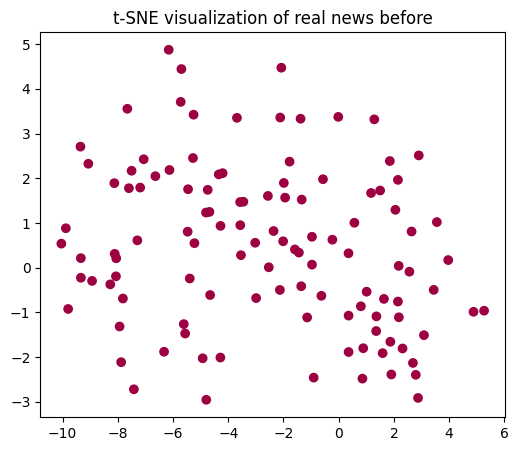

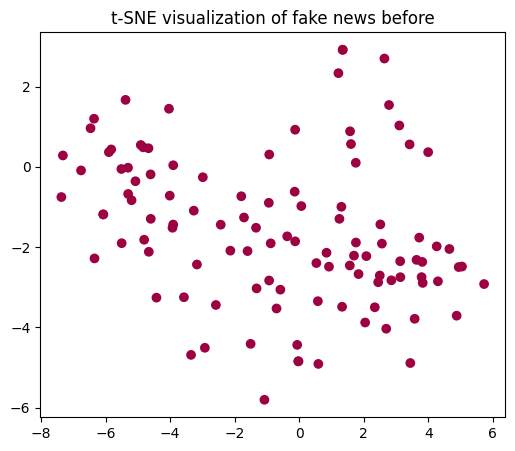

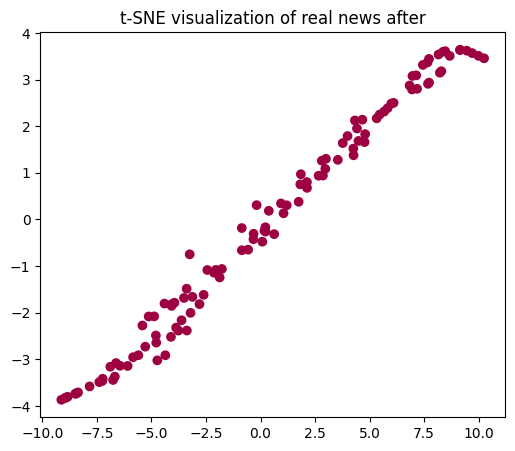

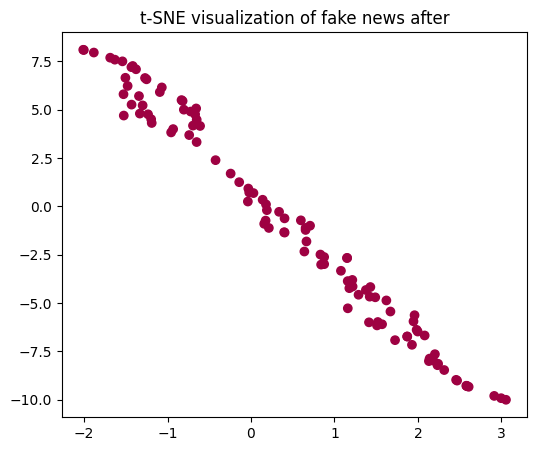

In [43]:
for data in new_test_loader:
  out = forward_for_viz(data)
test_y = test_data.data.y
test_real_before = out[test_y==1]
test_fake_before = out[test_y==0]
for data in new_test_loader:
  pred = best_model(data)
out_after = np.genfromtxt('embed.csv')
test_real_after = out_after[test_y==1]
test_fake_after = out_after[test_y==0]

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np

def plot_tsne(data, label, title):
    """
    Plot the t-SNE visualization of the data.
    """
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(data)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

def plot_pca(data, label, title):
    """
    Plot the PCA visualization of the data.
    """
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(data)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

def plot_hist(data, label, title):
    """
    Plot the histogram of the data.
    """
    plt.figure(figsize=(6, 5))
    plt.hist(data, bins=50, density=True, alpha=0.7, label=label)
    plt.title(title)
    plt.show()

plot_tsne(test_real_before, test_y[test_y==1], 't-SNE visualization of real news before')
plot_tsne(test_fake_before, test_y[test_y==0], 't-SNE visualization of fake news before')
plot_tsne(test_real_after, test_y[test_y==1], 't-SNE visualization of real news after')
plot_tsne(test_fake_after, test_y[test_y==0], 't-SNE visualization of fake news after')

In [44]:
# # Visualize out after for both real and fake news as graphs
# G_after = nx.Graph()
# for i in range(len(out_after)):
#   G_after.add_node(i)
# for i in range(len(out_after)):
#     for j in range(len(out_after)):
#         if i != j:
#             G_after.add_edge(i, j, weight = np.linalg.norm(out_after[i] - out_after[j]))

# # Define a layout for the nodes
# pos = nx.spring_layout(G_after)

# # REd color for real news, blue for fake news
# color_map = []
# for i in range(len(test_y)):
#     if test_y[i] == 1:
#         color_map.append('red')
#     else:
#         color_map.append('blue')

# # Draw the subgraph using Matplotlib
# nx.draw(G_after, pos, with_labels=True, node_size=300, node_color=color_map, font_size=10, font_color="black",
#         width=1.5,  # Increase the width of edges
#         arrows=True)

# plt.title("Sampled Directed Graph Visualization")
# plt.show()